Imports

In [ ]:
#Importar TensorFlow e Keras
import tensorflow
from tensorflow import keras
from keras.models import load_model

#Importando Pyplot
import matplotlib.pyplot as plt

#Importando Numpy
import numpy as np

Carregando dataset

In [ ]:
#Importando Dataset do Fashion MNIST e carregando dados
dataset = keras.datasets.fashion_mnist

#Dividindo entre treino e teste
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

Explorando dados

In [ ]:
#Vendo os valores possíves de identificações
identificacoes_treino.min()
identificacoes_treino.max()
total_identificacoes = 10

Exibição dos dados

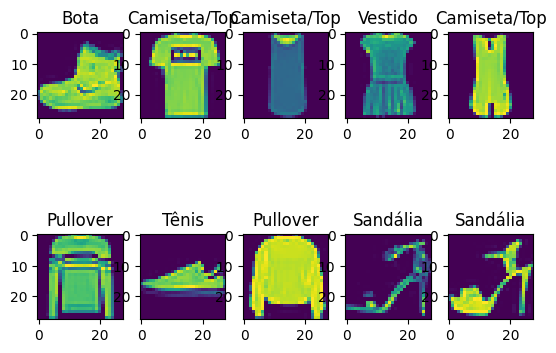

In [ ]:
#Definindo nomes para as identificações
nomes_identificacoes = ['Camiseta/Top', 'Calça', 'Pullover',
                        'Vestido', 'Casaco', 'Sandália',
                        'Camisa',
                        'Tênis', 'Bolsa', 'Bota']

#Exibindo imagens de treino com suas identificações
for imagem in range(10):
  plt.subplot(2, 5, imagem + 1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_identificacoes[identificacoes_treino[imagem]])

Criando e testando modelos diferentes

In [ ]:
#Primeiro modelo e primeiro fit
modelo = keras.Sequential([
   keras.layers.Flatten(input_shape=(28,28)),
   keras.layers.Dense(256, activation=tensorflow.nn.relu),
   keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 19s 10ms/step - loss: 3.5129


Normalizando imagens

In [ ]:
#Reduzindo perda do modelo usando normalização
imagens_treino = imagens_treino/float(255)

In [ ]:
#Novo fit com normalização aplicada nos dados
modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 11s 6ms/step - loss: 0.9528


In [ ]:
#Segundo modelo com uma camada extra
modelo = keras.Sequential([
   keras.layers.Flatten(input_shape=(28,28)),
   keras.layers.Dense(256, activation=tensorflow.nn.relu),
   keras.layers.Dense(128, activation=tensorflow.nn.relu),
   keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 12s 6ms/step - loss: 0.4722


In [ ]:
#Terceiro modelo com mais outra camada
modelo = keras.Sequential([
   keras.layers.Flatten(input_shape=(28,28)),
   keras.layers.Dense(256, activation=tensorflow.nn.relu),
   keras.layers.Dense(128, activation=tensorflow.nn.relu),
   keras.layers.Dense(64, activation=tensorflow.nn.relu),
   keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 17s 8ms/step - loss: 0.4834


In [ ]:
#Baseado no segundo modelo, porém com mais épocas de treino e com métricas
#e divisão dos dados para validação, e uma camada de dropout
modelo = keras.Sequential([
   keras.layers.Flatten(input_shape=(28,28)),
   keras.layers.Dense(256, activation=tensorflow.nn.relu),
   keras.layers.Dense(128, activation=tensorflow.nn.relu),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.5194 - accuracy: 0.8126 - val_loss: 0.3925 - val_accuracy: 0.8575
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3819 - accuracy: 0.8604 - val_loss: 0.3677 - val_accuracy: 0.8668
Epoch 3/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3465 - accuracy: 0.8722 - val_loss: 0.3572 - val_accuracy: 0.8685
Epoch 4/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3199 - accuracy: 0.8817 - val_loss: 0.3433 - val_accuracy: 0.8760
Epoch 5/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3052 - accuracy: 0.8870 - val_loss: 0.3400 - val_accuracy: 0.8767


Salvando e carregando modelo

In [ ]:
#Salvando o modelo
modelo.save('modelo.keras')

#Carregando modelo
modelo_salvo = load_model('modelo.keras')

Exibindo gráficos do treino

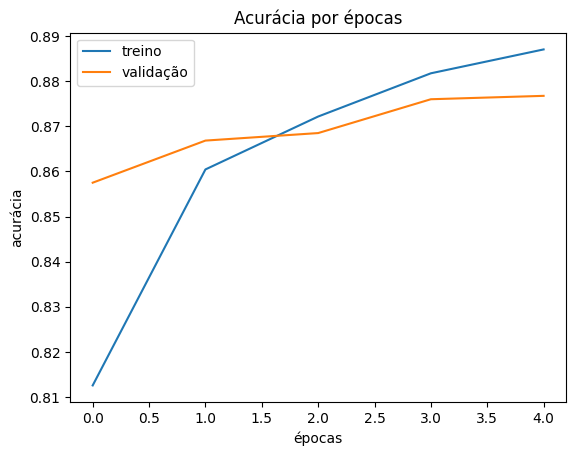

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

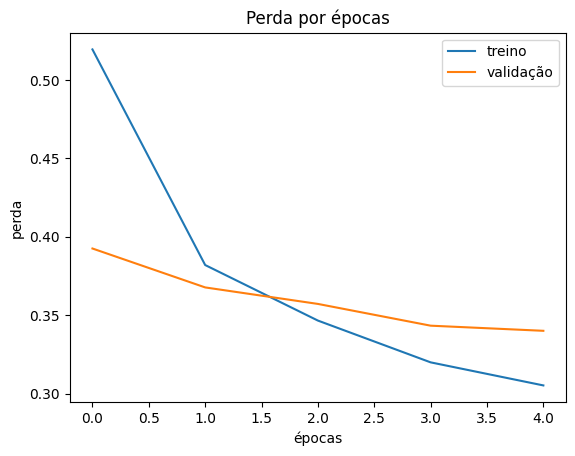

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o melhor modelo

In [ ]:
#Normalização dos itens de teste
imagens_teste = imagens_teste/float(255)

In [ ]:
#Usando o modelo salvo localmente
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)

313/313 [==============================] - 1s 2ms/step


In [ ]:
#Avalia a perda e a acurácia do modelo com o teste (modelo salvo)
perda_teste, acuracia_teste = modelo_salvo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste: ', perda_teste)
print('Acurácia do teste: ', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 0.3637 - accuracy: 0.8666
Perda do teste:  0.36371758580207825
Acurácia do teste:  0.866599977016449
